In [1]:
# COMENZAMOS CON EL ENTRENAMIENTO DE LOS MODELOSfrom sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sys import path
sys.path.append('C:\\Users\\Laura\\Desktop\\Nueva carpeta\\Code\\util')

from funciones import graficos_conf_matrix


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score,confusion_matrix,recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")


import pickle
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

In [2]:
# IMPORTAMOS EL CSV YA LIMPIO .
# LO VAMOS A DIVIDIR EN DOS, UNA PARTE PARA EL ENTRENAMIENTO-PREDICCIONES Y OTRA PARTE PARA EL TEST, COMO SI DE DATOS REALES SE TRATARAN


data_train = pd.read_csv('../Data/Processed/data_processed.csv', index_col=0)

data_train = data_train.iloc[:int(data_train.shape[0]*60/100), :]
data_test = data_train.iloc[int(data_train.shape[0]*60/100) : , :]

In [3]:
# DIVIDIMOS EN DATA_TRAIN EN TRAIN Y TEST


X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Target','Anxiety','Stress'], axis=1), data_train.Target, random_state=0, test_size=0.20, shuffle=True)



XGBOOST

In [4]:

# 
# CREACION DE PIPELINE INICIAL.
# HACEMOS UN GRIDSEARCH CON CROSS VALIDATIION
# LO INSTANCIAMOS

model_xgb = Pipeline (steps = [
                     ('scaler', MinMaxScaler()),
                     ('xgb', XGBClassifier())]
                    )  


params = {
          'xgb__max_depth' : range(3,10),
          'xgb__min_child_weight': range(1,50,3),
          'xgb__alpha': np.arange(0,0.5,0.1),
          'xgb__eta': np.arange(0.1,0.3,0.1)
         }


model_xgb_rsc = RandomizedSearchCV(model_xgb, params, cv=5, scoring='accuracy',n_iter= 100)
model_xgb_rsc.fit(X_train, y_train)

[01:30:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            enable_categorical=False,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type=None,
                                                            interaction_constraints=None,
                                             

In [5]:
# SACAMOS LOS MEJORES PARÁMETROS PARA ENTRENAR EL MODELO

print (model_xgb_rsc.best_params_)
print (model_xgb_rsc.best_estimator_)

{'xgb__min_child_weight': 46, 'xgb__max_depth': 3, 'xgb__eta': 0.1, 'xgb__alpha': 0.0}
Pipeline(steps=[('scaler', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(alpha=0.0, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eta=0.1, gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.100000001, max_delta_step=0,
                               max_depth=3, min_child_weight=46, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               

In [6]:
#CREAMOS UN NUEVO PIPELINE CON EL RESULTADO MEJOR RESULTADO DEL GRIDSEARCH
model_xgb_V1 = model_xgb_rsc.best_estimator_

In [7]:
model_xgb_V1

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(alpha=0.0, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eta=0.1, gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.100000001, max_delta_step=0,
                               max_depth=3, min_child_weight=46, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=No

In [8]:
# ENTRENAMOS EL MODELO Y SACAMOS LAS PREDICCIONES

model_xgb_V1.fit(X_train,y_train)
y_predi = model_xgb_V1.predict(X_test)

[01:38:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [9]:
# PASAMOS LAS METRICAS A UN DATAFRAM

df_scores = pd.read_csv('../Model/scores_models_Accu.csv', index_col=0)
df_scores['xgb_data_train'] =[recall_score(y_test,y_predi), roc_auc_score(y_test,y_predi),  accuracy_score(y_test, y_predi), f1_score(y_test, y_predi)]


df_scores

,log_re_data_train,log_re_test,rf_train,rf_test,knn_data_train,knn_data_test,xgb_data_train,xgb_data_test
Recall,0.892384,0.895201,0.830795,0.821265,0.870861,0.868747,0.855298,0.850941
Auc,0.843511,0.847984,0.869191,0.876925,0.853000,0.862025,0.865755,0.871072
Accuracy,0.856484,0.859103,0.858999,0.863817,0.857741,0.863608,0.862979,0.866331
F1_score,0.887243,0.887003,0.881743,0.881668,0.885671,0.887253,0.887629,0.887199


In [10]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_train = confusion_matrix(y_test, y_predi)

In [11]:
# GUARDAMOS EL MODELO

with open('../Model/model_xgb_V1', 'wb') as archivo_salida:
    pickle.dump(model_xgb_V1, archivo_salida)

In [12]:
# PROBAMOS EL MODELO CON LOS DATOS RESERVADOS PARA VER COMO GENERALIZA

X = data_test.drop(columns=['Target','Anxiety','Stress'], axis=1)
y= data_test.Target

with open('../Model/model_xgb_V1', 'rb') as archivo_entrada:
    loaded_model = pickle.load(archivo_entrada)

In [13]:
loaded_model

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('xgb',
                 XGBClassifier(alpha=0.0, base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eta=0.1, gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.100000001, max_delta_step=0,
                               max_depth=3, min_child_weight=46, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=No

In [14]:
# PASAMOS LAS METRICAS A UN DATAFRAM
df_scores['xgb_data_test'] =[recall_score(y,loaded_model.predict(X)), roc_auc_score(y,loaded_model.predict(X)), accuracy_score(y, loaded_model.predict(X)), f1_score(y, loaded_model.predict(X))]
df_scores.to_csv('../Model/scores_models_Accu.csv')
df_scores

,log_re_data_train,log_re_test,rf_train,rf_test,knn_data_train,knn_data_test,xgb_data_train,xgb_data_test
Recall,0.892384,0.895201,0.830795,0.821265,0.870861,0.868747,0.855298,0.853654
Auc,0.843511,0.847984,0.869191,0.876925,0.853000,0.862025,0.865755,0.871058
Accuracy,0.856484,0.859103,0.858999,0.863817,0.857741,0.863608,0.862979,0.866960
F1_score,0.887243,0.887003,0.881743,0.881668,0.885671,0.887253,0.887629,0.887987


In [15]:
# GUARDAMOS LA CONFUSION MATRIX PARA DESPUES GRAFICARLA
c_matrix_test = confusion_matrix(y,loaded_model.predict(X))

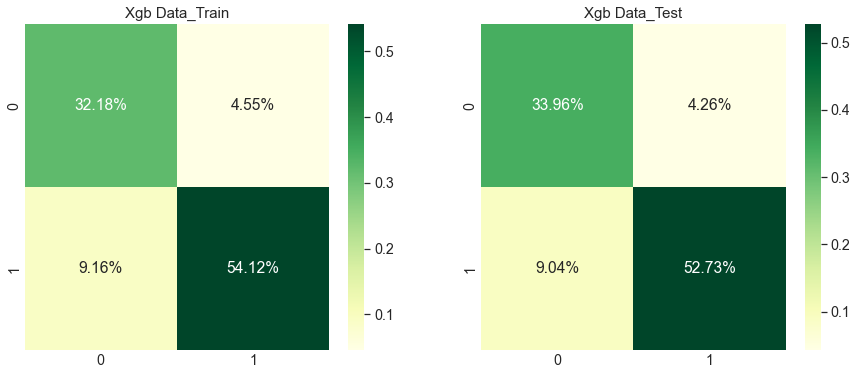

In [17]:


graf_xgb_A_matriz = plt.figure(figsize=(15,6))


plt.style.use('seaborn-whitegrid')
plt.subplot(1,2,1)
sns.set(font_scale = 1.3)
graficos_conf_matrix(c_matrix_train,'Xgb Data_Train')

plt.style.use('seaborn-whitegrid')
plt.subplot(1,2,2)
sns.set(font_scale = 1.3)
graficos_conf_matrix(c_matrix_test,'Xgb Data_Test')

graf_xgb_A_matriz.savefig ('../util/Graficos/graf_xgb_A_matriz.png')